In [1]:
 import pandas as pd

df = pd.read_csv('delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


### Data prep

In [8]:
y = df['logS']
X = df.drop('logS', axis=1)

### Data split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### Model building

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

### Evaluate

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print(f'Mse train {lr_train_mse}\nR2 train {lr_train_r2}\nMse test {lr_test_mse}\nR2 test {lr_test_r2}')

Mse train 1.0075362951093687
R2 train 0.7645051774663391
Mse test 1.0206953660861036
R2 test 0.7891616188563282


In [23]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose() 
lr_results.columns = ['Method', 'Trainng MSE', 'Training R2', 'Test MSE', 'Test R2']

In [24]:
lr_results

,Method,Trainng MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


### Random forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print(f'Mse train {rf_train_mse}\nR2 train {rf_train_r2}\nMse test {rf_test_mse}\nR2 test {rf_test_r2}')

Mse train 1.028227802112806
R2 train 0.7596688824431413
Mse test 1.407688264904896
R2 test 0.7092230211002489


In [30]:
rf_results = pd.DataFrame(['Linear regression', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose() 
rf_results.columns = ['Method', 'Trainng MSE', 'Training R2', 'Test MSE', 'Test R2']

In [31]:
rf_results

,Method,Trainng MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.028228,0.759669,1.407688,0.709223


In [38]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Trainng MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Linear regression,1.028228,0.759669,1.407688,0.709223


### Visualisation

Text(0.5, 0, 'Experimental LogS')

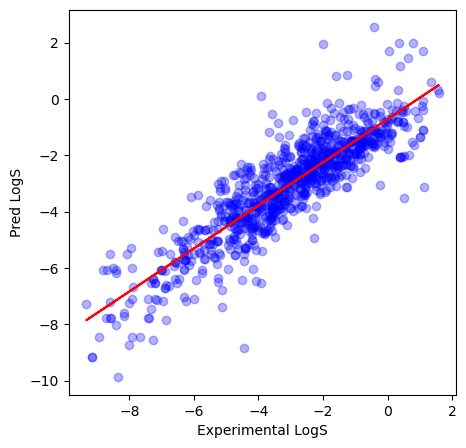

In [40]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c='blue', alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p= np.poly1d(z)

plt.plot(y_train, p(y_train), 'red')
plt.ylabel('Pred LogS')
plt.xlabel('Experimental LogS')